In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In the above code, we are importing tensorflow, and from tensorflow importing keras (tensorflow 2.0 has inbuit Keras) and import matplotlib for plotting images, importing numpy for vector/tensor based calculations.

In [ ]:
(x_train, y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


We are now loading our data set "mnist" and seperating them into training and test data set.

In [ ]:
len(x_train)

60000

Out x_train that is our training data set now contains 60,000 images.

In [ ]:
len(x_test)

10000

Our test data set contains 10,000 test images. We can divide the data set into training and test in any ratio and for that we have to use one more argument while loading data set.

In [ ]:
x_train[0].shape

(28, 28)

Our x_train shape is [60,000 * 28 * 28] that is 60,000 images each of which is 28 by 28 in dimension.

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

x_train[0] will give us the first image data as a matrix, which is shown above.

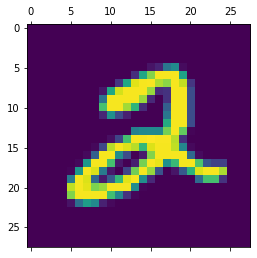

In [ ]:
plt.matshow(x_train[5])

If we use x_train[0] we get the first image as a matrix, if we want to see it as an image, we use plt.matshow command.

In [ ]:
y_train[5]

2

y_train is just an array with length 60,000 having each value as a class (0 to 9 here because we want to classify hand written digits from 0 to 9).

In [ ]:
y_train[2:10]

array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

We are just displaying the values here from 2 to 10

In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Displaying values from 0 to 10

In [ ]:
x_train.shape

(60000, 28, 28)

Before building the ANN model, we want to resize our image in order to build a neural network. So we have to flatten the 28 by 28 matrix into 28*28 by 1 vector.

In [ ]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

Reshape our training data into 60,000 images and each having 28*28 by 1 as a dimension.

In [ ]:
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

Reshape our test data into 60,000 images and each having 28*28 by 1 as a dimension.

In [ ]:
x_train_flatten[2:12]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

After flattening, printing the values of images from 2 to 12.

In [ ]:
x_train_flatten[0][200:250]

array([  0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253,
       251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198,
       182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

After flattening and seeing the values in the first image from index 200 to 250. We can still see that our values range from 0 to 255.

In [ ]:
x_train_flatten = x_train_flatten/255
x_train_flatten[0][200:250]

array([0.        , 0.        , 0.        , 0.19215686, 0.93333333,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.98431373, 0.36470588,
       0.32156863, 0.32156863, 0.21960784, 0.15294118, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07058824, 0.85882353, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.77647059, 0.71372549,
       0.96862745, 0.94509804, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Because our machine learning model works better when our input values are normalised, we are bringing all the values into the range 0 to 1 by dividing it with 255. The maximum value is 255 because the image is 8 bit so each pixel value will range from 0 to 2^8 - 1.

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We are building our model here. We use keras.sequential to specify all of our layers. We only have one layer that is directly our output layer (no hidden layers). We use keras.layers.Dense for that to which we provide number of neurons in output, input shape, activation as sigmoid.



Then we compile the model. Optimizer is adam which is most commonly used, loss is 'sparse_categorical_crossentropy' because we have y=0 for class 0 and so on. if y=000000000 for 0 and y=000010000 for 5, then it should be 'categorical_crossentropy'.



And now, we summarize our model to check it.

In [ ]:
model.fit(x_train_flatten, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4753 - accuracy: 0.8756
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9230
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9258
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9282
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9285
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2558 - accuracy: 0.9286
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2534 - accuracy: 0.9298
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

We are now trainig our model for 20 epochs (iterations), which uses adam optimiser.

In [ ]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 906us/step - loss: 66.4861 - accuracy: 0.8864


[66.48612213134766, 0.8863999843597412]

Now that the training is done, we evaluate our model performance on test data set. We can see that the model is 88.6% accurate.

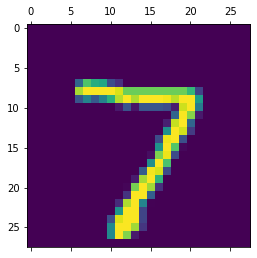

In [ ]:
plt.matshow(x_test[0])

1st image in our test set is a number '7'. Let's see what our model has predicted.

In [ ]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

Our model predicts an array of values that is probability of the given number being 0,1...9 so we have to take the maximum probability.

In [ ]:
np.argmax(y_predicted[0])

3

Argmax in Numpy gives us the index that is maximum in the given array and because our index and numbers are the same, we can take it as our number. So here our image was '7' but our model predicted that it is 3.

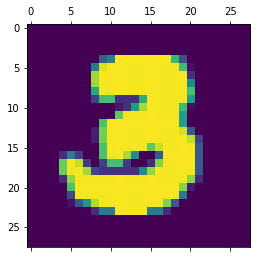

In [ ]:
plt.matshow(x_test[200])

Our 201th image is number 3.

In [ ]:
np.argmax(y_predicted[200])

2

Our model predicted that it is number 2.

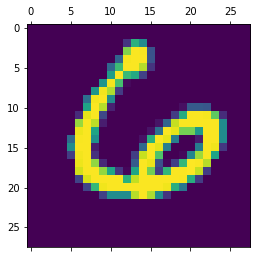

In [ ]:
plt.matshow(x_test[201])

202th image in x_test is number 6.

In [ ]:
np.argmax(y_predicted[201])

6

Our model predicted that the number is 6. So this prediction is correct.

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

y_test contains numbers.

In [ ]:
y_predicted[:5]

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.596622  , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.01750854, 1.        ]],
      dtype=float32)

y_predicted contains the probabilities as we have seen while checking what our model has predicted.

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 2, 1, 0, 4]

We are now converting all our y_predicted into a single number that is the index with maximum probability.

In [ ]:
conf_matrx = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
conf_matrx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    3,    0,    0,    1,    0,    2,    0],
       [   2, 1117,    7,    1,    1,    0,    3,    0,    4,    0],
       [  64,   60,  869,    7,    7,    0,    5,    1,   17,    2],
       [  31,    0,  165,  799,    1,    3,    0,    2,    9,    0],
       [  16,    1,    9,    9,  927,    0,    2,    2,   13,    3],
       [  64,    4,   30,  250,   17,  477,    7,    3,   39,    1],
       [  67,    4,  255,    2,   22,   14,  591,    1,    2,    0],
       [  13,    8,   54,  410,   42,    2,    0,  490,    7,    2],
       [  17,   14,   70,  175,   11,   36,   24,   12,  615,    0],
       [  14,    9,    0,   97,  390,    1,    0,  203,  185,  110]],
      dtype=int32)>

We are now getting our confusion matrix. Confusuon matrix is better visualised in the heatmap below.

Text(69.0, 0.5, 'Actual value')

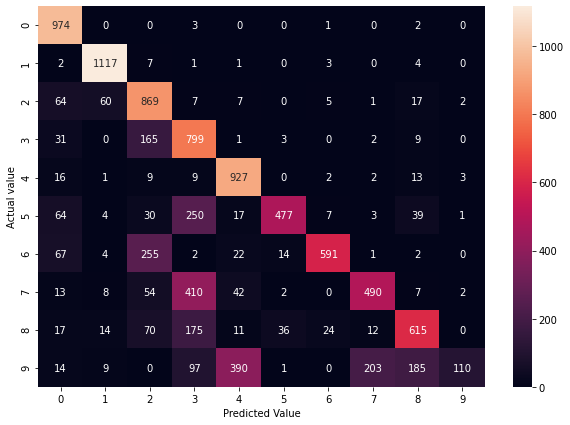

In [ ]:
import seaborn as sbn
plt.figure(figsize=(10,7))
sbn.heatmap(conf_matrx, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')

To show the heatmap, we used seaborn. The values on Y axis are the actual values and the values on the x axis are values predicted by our model.

In 0th row and 0th column we see the number 974 which means our model predicted the actaul value 974 times. Similarly in row 1 and column 0 it shows 2 which means, our model predicted value as 0 when the actaul value is 1 for 2 times.

In [ ]:
model_hl = keras.Sequential([
                          keras.layers.Dense(90, input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model_hl.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_hl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 90)                70650     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                910       
Total params: 71,560
Trainable params: 71,560
Non-trainable params: 0
_________________________________________________________________


We are now building the same model with  extra 1 hidden layer that contains 90 neurons. For the output layer, we now are not required to give the input shape because keras figures it out. We used ReLU activation here instead of using Sigmoid.

In [ ]:
model_hl.fit(x_train_flatten,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.9202
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1287 - accuracy: 0.9621
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0911 - accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0702 - accuracy: 0.9789
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0551 - accuracy: 0.9838
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9854
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0379 - accuracy: 0.9881
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9900
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.022

We are now fitting our same data into this new model for same 20 epochs.


In [ ]:
model_hl.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 27.1020 - accuracy: 0.9767


[27.102006912231445, 0.9767000079154968]

Our accuracy has increased because of the one more layer that we have introduced. From 88% to 97% it is a huge jump. Using ReLu and one more hidden layer contribute to the jump in the accuracy.

Text(69.0, 0.5, 'Actual value New')

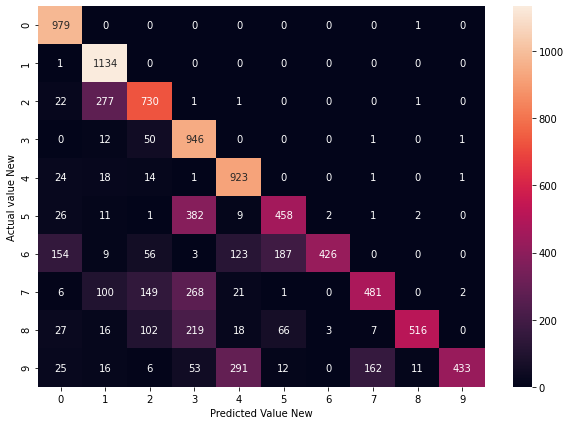

In [ ]:
y_predicted_new = model_hl.predict(x_test_flatten)
y_predicted_labels_new = [np.argmax(i) for i in y_predicted_new]

conf_matrx_new = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_new)

plt.figure(figsize=(10,7))
sbn.heatmap(conf_matrx_new, annot=True, fmt='d')
plt.xlabel('Predicted Value New')
plt.ylabel('Actual value New')

We are now evaluating our model with the new confusion matrix.

In [ ]:
model = keras.Sequential([
                          keras.layers.flatten(input_shape = (28,28)),
                          keras.layers.Dense(90, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

If we want to directly give our image even before flattening it, we can do it by adding an extra layer that flattens the input as shown. This is a good practice in Deep Learning.